# Neural Networks

## Convoluted neural network

Al algorithm used to classify images.

In [1]:
###############
### Imports ###
###############

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [2]:
train_dir = '../Data/train'
test_dir = '../Data/test'
print(tf.config.get_visible_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
batch_size = 16

train_datagen = ImageDataGenerator(rescale=1./255,                   
                                   validation_split=0.15)

train_generator = train_datagen.flow_from_directory(
train_dir, 
target_size=(102,136), 
color_mode='rgb', 
batch_size=batch_size, 
class_mode='categorical', 
subset='training',
shuffle=True,
seed=42
)
validation_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(102,136), 
color_mode='rgb', 
batch_size=batch_size, 
class_mode='categorical', 
subset='validation', 
shuffle=False
)

Found 12495 images belonging to 3 classes.
Found 2205 images belonging to 3 classes.


In [4]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
test_dir,
target_size=(102,136), 
color_mode='rgb', 
batch_size=batch_size, 
class_mode=None, 
shuffle=False
)

Found 300 images belonging to 3 classes.


In [5]:
model = Sequential()
model.add(Conv2D(102, kernel_size = (3,3), activation='relu',input_shape=(102,136,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, kernel_size = (5,5), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(16, kernel_regularizer='l2'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))
            
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 134, 102)     2856      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 67, 102)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 63, 64)        163264    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 31, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 45632)             0         
                                                                 
 dense (Dense)               (None, 16)                7

In [6]:
callback = tf.keras.callbacks.ModelCheckpoint(
                                                filepath='../Data/weights.h5',
                                                save_weights_only=True,
                                                monitor='val_accuracy',
                                                mode='max',
                                                save_best_only=True)

model.fit(train_generator,
          steps_per_epoch=100,
          epochs=100,
          callbacks=callback,
          validation_data=(validation_generator),
          validation_steps=10)
          
model.load_weights('../Data/weights.h5')

Epoch 1/100
100/100 [==============================] - 4s 24ms/step - loss: 1.0762 - accuracy: 0.6781 - val_loss: 0.2943 - val_accuracy: 0.9750
Epoch 2/100
100/100 [==============================] - 2s 22ms/step - loss: 0.5854 - accuracy: 0.8181 - val_loss: 0.2279 - val_accuracy: 0.9500
Epoch 3/100
100/100 [==============================] - 2s 22ms/step - loss: 0.4869 - accuracy: 0.8456 - val_loss: 0.3194 - val_accuracy: 0.9125
Epoch 4/100
100/100 [==============================] - 2s 21ms/step - loss: 0.4308 - accuracy: 0.8512 - val_loss: 0.2687 - val_accuracy: 0.9187
Epoch 5/100
100/100 [==============================] - 2s 22ms/step - loss: 0.4001 - accuracy: 0.8625 - val_loss: 0.2182 - val_accuracy: 0.9438
Epoch 6/100
100/100 [==============================] - 2s 21ms/step - loss: 0.3959 - accuracy: 0.8744 - val_loss: 0.1772 - val_accuracy: 0.9563
Epoch 7/100
100/100 [==============================] - 2s 21ms/step - loss: 0.3938 - accuracy: 0.8781 - val_loss: 0.4119 - val_accuracy:

1/1 [==============================] - 0s 26ms/step


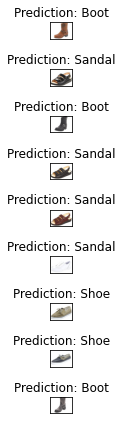

In [8]:
images = np.array([plt.imread(f'../Data/expo/000{i}.jpg') for i in range(1,10)])
predict = model.predict(images)
class_lookup = {v: k for k, v in train_generator.class_indices.items()}
labels = [class_lookup[i] for i in predict.argmax(axis=-1)]
fig, axes = plt.subplots(len(labels), figsize=(6,6))
for ax, im, lab in zip(axes,images,labels):
    ax.imshow(im)
    ax.set(title = f'Prediction: {lab}', xticks =[], yticks =[])
fig.tight_layout()
plt.show(); 